# Holt Exponential Smoothing (= with trend, but no seasonality)

#### Predicting flight passengers for the next 5 years using Holt's Exponential smoothing
#### Holt's exponential smoothing is also known as double smoothing

#### https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

In [1]:
# getting some warnings from matplotlib, so turning those warnings off
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# statsmodels documentation on simple exponential smoothing:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
# reading csv to dataframe
filename = './data/airline5.csv'
df = pd.read_csv(filename)

In [4]:
# inspecting data: passengers should be, DATE_ should be index and better called year
df.head(3)

,passengers,fpass,YEAR_,DATE_
0,1839344.000,36.827,1949.000,1949
1,2132542.000,38.214,1950.000,1950
2,2471044.000,39.648,1951.000,1951


In [5]:
# setting year as index and dropping some columns
df = (df.assign(year=lambda x: x['YEAR_'].astype(int))
        .set_index('year')
        .drop(columns=['YEAR_', 'DATE_'])
)

In [6]:
# nice and clean data
df.head(3)

,passengers,fpass
year,,
1949,1839344.000,36.827
1950,2132542.000,38.214
1951,2471044.000,39.648


In [7]:
# train the Holt model aka double smoothing
double_smoothing = ExponentialSmoothing(df['fpass'], trend='additive', seasonal=None).fit()

In [8]:
# parameters found by model
double_smoothing.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 35.284900603016986,
 'initial_slope': 1.5420480559717757,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [9]:
# Sum of Squared Errors of the residuals
# and RMSE. Since there are 2 parameters (alpha and gamma), degrees of freedom is 2.
sse = double_smoothing.sse
rmse = np.sqrt(sse / (len(df) - 2))
print("SSE: {}\nRMSE: {}".format(sse, rmse))

SSE: 46.39590672859938
RMSE: 0.9730648690396602


In [10]:
# add fitted values and residuals to dataframe
df['fpass_fitted'] = double_smoothing.fittedvalues
df['fpass_resid'] = double_smoothing.resid

In [11]:
# calculate predictions for the next 5 years
predictions = double_smoothing.predict(start=len(df), end=len(df)+4)
predictions.index = range(2000, 2005)
predictions

2000   115.471
2001   117.013
2002   118.555
2003   120.098
2004   121.640
dtype: float64

In [12]:
# concatenate the predictions to dataframe
df = pd.concat([df, predictions]).rename(columns={0:'fpass_predicted'})

In [13]:
# check predictions
df.tail(6)

,passengers,fpass,fpass_fitted,fpass_resid,fpass_predicted
1999,168477753.000,113.929,113.834,0.096,nan
2000,nan,nan,nan,nan,115.471
2001,nan,nan,nan,nan,117.013
2002,nan,nan,nan,nan,118.555
2003,nan,nan,nan,nan,120.098
2004,nan,nan,nan,nan,121.640


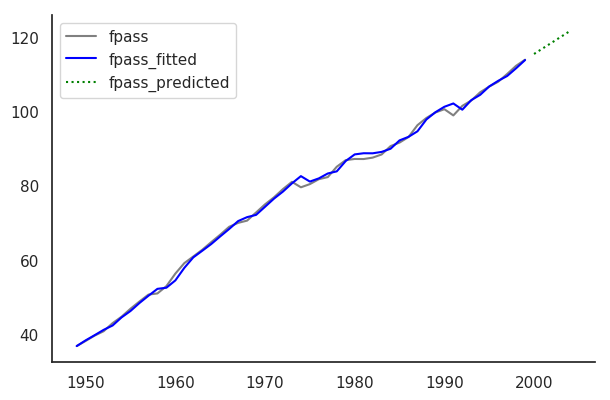

In [14]:
# plot results for fpass: original, fitted and predicted
df[['fpass', 'fpass_fitted', 'fpass_predicted']].plot(
    color=['grey', 'blue', 'green'],
    style=['-','-',':'],
)
sns.despine();

In [15]:
# calculate real passenger numbers
df['passengers_fitted'] = df['fpass_fitted'] ** 4.0
df['passengers_predicted'] = df['fpass_predicted'] ** 4.0
df['passengers_residual'] = df['passengers'] - df['passengers_fitted']

In [16]:
# show current dataframe
df.tail(10)

,passengers,fpass,fpass_fitted,fpass_resid,fpass_predicted,passengers_fitted,passengers_predicted,passengers_residual
1995,129586056.000,106.694,106.717,-0.024,nan,129700734.428,nan,-114678.428
1996,135997845.000,107.990,108.236,-0.246,nan,137241676.494,nan,-1243831.494
1997,146822932.000,110.077,109.532,0.546,nan,143933778.077,nan,2889153.923
1998,158996788.000,112.292,111.620,0.672,nan,155224655.856,nan,3772132.144
1999,168477753.000,113.929,113.834,0.096,nan,167912062.810,nan,565690.190
2000,nan,nan,nan,nan,115.471,nan,177786089.771,nan
2001,nan,nan,nan,nan,117.013,nan,187474912.699,nan
2002,nan,nan,nan,nan,118.555,nan,197554451.642,nan
2003,nan,nan,nan,nan,120.098,nan,208035072.165,nan
2004,nan,nan,nan,nan,121.640,nan,218927275.543,nan


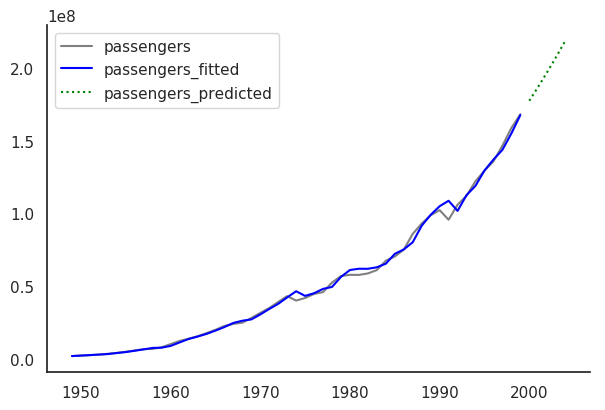

In [17]:
# plot results for real passenger numbers: original, fitted and predicted
df[['passengers', 'passengers_fitted', 'passengers_predicted']].plot(
    color=['grey', 'blue', 'green'],
    style=['-','-',':'],
)
sns.despine();